In [1]:
import os
import sys

import pandas as pd
import numpy as np
import math

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(1,4) # [,1,2]
    for i in pq_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,0,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, 0, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: %6.5f | order: %s'%(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

In [3]:
df = pd.read_csv("AlphaMergedV2.csv")  

df2 = df[df['name'] == 'SBUX']
close = df2.close
time = df2.timestamp
df2 = pd.concat([close, time], axis = 1)

df2.set_index('timestamp', inplace = True)
close = df2.iloc[::-1]
close.head()

,close
timestamp,
1998-01-23,34.88
1998-01-26,34.25
1998-01-27,33.63
1998-01-28,34.88
1998-01-29,36.56


In [4]:
# log returns
lrets = np.log(close['close']/close['close'].shift(1)).fillna(0)
lrets.head()

timestamp
1998-01-23    0.000000
1998-01-26   -0.018227
1998-01-27   -0.018268
1998-01-28    0.036495
1998-01-29    0.047041
Name: close, dtype: float64

In [5]:
print(lrets[5268:5270])  # 2019 Jan starts from index 5269, ends at index 5289, step 21

print(lrets[5290:5292])   # 2019 Feb starts from index 5290, ends at index 5308, step 19

print(lrets[5309:5311])   # 2019 Mar starts from index 5309, ends at index 5329, step 21
print(lrets[5329:5331])  

timestamp
2018-12-31    0.015808
2019-01-02   -0.001243
Name: close, dtype: float64
timestamp
2019-02-01   -0.000440
2019-02-04   -0.007812
Name: close, dtype: float64
timestamp
2019-03-01    0.008362
2019-03-04    0.001410
Name: close, dtype: float64
timestamp
2019-03-29    0.005125
2019-04-01   -0.005125
Name: close, dtype: float64


In [6]:
JanS = 5269
JanE = 5289

FebS = 5290
FebE = 5308

MarS = 5309
MarE = 5329

# Jan

In [7]:
# predict for 2019 Jan
TS1 = lrets[1:JanS]    # change index

res_tup = _get_best_model(TS1)
order = res_tup[1]
model = res_tup[2]

p_ = order[0]
o_ = order[1]
q_ = order[2]

am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
out = res.forecast(horizon=21, start=None, align='origin')   # change horizon
#horizon : int, optional  Number of steps to forecast

out.mean.tail()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

aic: -22137.28025 | order: (3, 0, 3)


/anaconda3/lib/python3.6/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19,h.20,h.21
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,...,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342


In [8]:
preJan = 0*lrets[JanS:JanE+1]
for d in range(len(preJan)):
    if d < 9:
        colname = 'h.0' + str(d+1)
    else:
        colname = 'h.' + str(d+1)    
    preJan.iloc[d] = out.mean[colname].iloc[-1]

In [9]:
retsJan = pd.DataFrame(index = preJan.index, columns=['Real value', 'Prediction'])
retsJan['Real value'] = lrets[JanS:JanE+1]
retsJan['Prediction'] = preJan 

Jan = pd.DataFrame(index = preJan.index, columns=['Real value', 'Prediction'])
Jan['Real value']=retsJan['Real value'].cumsum()
Jan['Prediction'] = retsJan['Prediction'].cumsum()

JanReverse = pd.DataFrame(index = preJan.index, columns=['Real value', 'Prediction'])
JanReverse['Real value'] = Jan['Real value'] + np.log(close[JanS - 1:JanS])['close'].iloc[0] # add log of real value of 2018/12/31
JanReverse['Prediction'] = Jan['Prediction'] + np.log(close[JanS - 1:JanS])['close'].iloc[0]

for d in range(len(preJan)):
    JanReverse['Real value'].iloc[d] = math.exp( JanReverse['Real value'].iloc[d] )  # reverse log
    JanReverse['Prediction'].iloc[d] = math.exp( JanReverse['Prediction'].iloc[d] )
    
JanReverse

,Real value,Prediction
timestamp,,
2019-01-02,64.32,64.422021
2019-01-03,61.53,64.444050
2019-01-04,63.57,64.466087
2019-01-07,63.57,64.488131
2019-01-08,63.62,64.510182
2019-01-09,63.88,64.532242
2019-01-10,64.19,64.554308
2019-01-11,63.73,64.576382
2019-01-14,63.37,64.598464


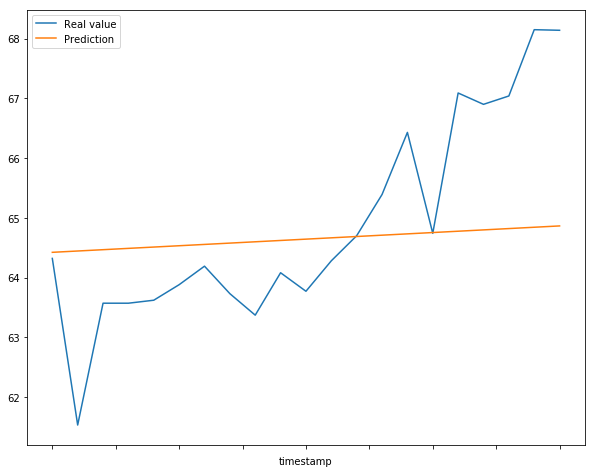

In [10]:
JanReverse['Real value'].plot(figsize=(10,8))
JanReverse['Prediction'].plot()
plt.legend()
plt.show()

# Feb

In [11]:
# predict for 2019 Feb
TS2 = lrets[1:FebS]    # change index

res_tup = _get_best_model(TS2)
order = res_tup[1]
model = res_tup[2]

p_ = order[0]
o_ = order[1]
q_ = order[2]

am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
out = res.forecast(horizon=19, start=None, align='origin')   # change horizon
#horizon : int, optional  Number of steps to forecast

out.mean.tail()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

aic: -22250.91352 | order: (3, 0, 2)


/anaconda3/lib/python3.6/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,h.11,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19
timestamp,,,,,,,,,,,,,,,,,,,
2019-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-31,0.000616,0.000616,0.000616,0.000616,0.000616,0.000616,0.000616,0.000616,0.000616,0.000616,0.000616,0.000616,0.000616,0.000616,0.000616,0.000616,0.000616,0.000616,0.000616


In [12]:
preFeb = 0*lrets[FebS:FebE+1]
for d in range(len(preFeb)):
    if d < 9:
        colname = 'h.0' + str(d+1)
    else:
        colname = 'h.' + str(d+1)    
    preFeb.iloc[d] = out.mean[colname].iloc[-1]

In [13]:
retsFeb = pd.DataFrame(index = preFeb.index, columns=['Real value', 'Prediction'])
retsFeb['Real value'] = lrets[FebS:FebE+1]
retsFeb['Prediction'] = preFeb

Feb = pd.DataFrame(index = preFeb.index, columns=['Real value', 'Prediction'])
Feb['Real value']=retsFeb['Real value'].cumsum()
Feb['Prediction'] = retsFeb['Prediction'].cumsum()

FebReverse = pd.DataFrame(index = preFeb.index, columns=['Real value', 'Prediction'])
FebReverse['Real value'] = Feb['Real value'] + np.log(close[FebS-1:FebS])['close'].iloc[0] # add log of real value at 2018/12/31
FebReverse['Prediction'] = Feb['Prediction'] + np.log(close[FebS-1:FebS])['close'].iloc[0]

for d in range(len(preFeb)):
    FebReverse['Real value'].iloc[d] = math.exp( FebReverse['Real value'].iloc[d] )  # reverse log
    FebReverse['Prediction'].iloc[d] = math.exp( FebReverse['Prediction'].iloc[d] )
    
FebReverse

,Real value,Prediction
timestamp,,
2019-02-01,68.11,68.181997
2019-02-04,67.58,68.224019
2019-02-05,69.34,68.266068
2019-02-06,68.85,68.308142
2019-02-07,69.14,68.350243
2019-02-08,69.75,68.392369
2019-02-11,69.99,68.434522
2019-02-12,69.75,68.476700
2019-02-13,70.51,68.518904


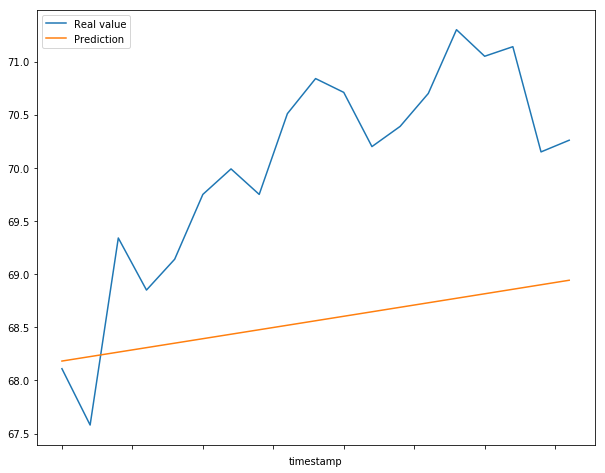

In [14]:
FebReverse['Real value'].plot(figsize=(10,8))
FebReverse['Prediction'].plot()
plt.legend()
plt.show()

# Mar

In [15]:
# predict for 2019 Mar
TS3 = lrets[1:MarS]    # change index

res_tup = _get_best_model(TS3)
order = res_tup[1]
model = res_tup[2]

p_ = order[0]
o_ = order[1]
q_ = order[2]

am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
out = res.forecast(horizon=21, start=None, align='origin')   # change horizon
#horizon : int, optional  Number of steps to forecast

out.mean.tail()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

aic: -22348.27214 | order: (3, 0, 2)


/anaconda3/lib/python3.6/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19,h.20,h.21
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-28,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,...,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006


In [16]:
preMar = 0*lrets[MarS:MarE+1]
for d in range(len(preMar)):
    if d < 9:
        colname = 'h.0' + str(d+1)
    else:
        colname = 'h.' + str(d+1)    
    preMar.iloc[d] = out.mean[colname].iloc[-1]

In [17]:
retsMar = pd.DataFrame(index = preMar.index, columns=['Real value', 'Prediction'])
retsMar['Real value'] = lrets[MarS:MarE+1]
retsMar['Prediction'] = preMar 

Mar = pd.DataFrame(index = preMar.index, columns=['Real value', 'Prediction'])
Mar['Real value']=retsMar['Real value'].cumsum()
Mar['Prediction'] = retsMar['Prediction'].cumsum()

MarReverse = pd.DataFrame(index = preMar.index, columns=['Real value', 'Prediction'])
MarReverse['Real value'] = Mar['Real value'] + np.log(close[MarS-1:MarS])['close'].iloc[0] # add log of real value at 2018/12/31
MarReverse['Prediction'] = Mar['Prediction'] + np.log(close[MarS-1:MarS])['close'].iloc[0]

for d in range(len(preMar)):
    MarReverse['Real value'].iloc[d] = math.exp( MarReverse['Real value'].iloc[d] )  # reverse log
    MarReverse['Prediction'].iloc[d] = math.exp( MarReverse['Prediction'].iloc[d] )
    
MarReverse

,Real value,Prediction
timestamp,,
2019-03-01,70.85,70.302151
2019-03-04,70.95,70.344328
2019-03-05,71.58,70.386530
2019-03-06,71.27,70.428757
2019-03-07,70.61,70.471009
2019-03-08,69.36,70.513287
2019-03-11,69.68,70.555590
2019-03-12,70.05,70.597919
2019-03-13,70.10,70.640273


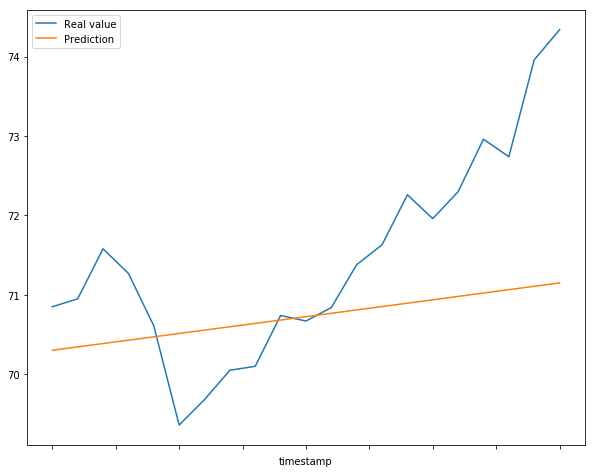

In [18]:
MarReverse['Real value'].plot(figsize=(10,8))
MarReverse['Prediction'].plot()
plt.legend()
plt.show()

# Combine Dataframes of 3 months

In [20]:
SBUX = pd.concat([JanReverse, FebReverse, MarReverse])
SBUX.columns = ['SBUX real value', 'SBUX prediction']
SBUX.to_csv('SBUX_pred.csv')